# **Introducción a R para Análisis de Datos**
## Capítulo 6: Visualización de Datos
---
Acerca de este notebook
* **Autor:** Juan Martin Bellido
* **Descripción:** *este notebook incluye las soluciones a los ejercicios del capítulo 6*
* **¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)


In [ ]:
# instalamos librerías
install.packages("data.table")
install.packages("ggcorrplot")
install.packages("PerformanceAnalytics")

# Capítulo 6: Ejercicios
---

### Ejercicio #1
Partiendo del dataset publicado por la *World Health Organization*, visualizar un gráfico de dispersión para estudiar el grado de asociación entre el PIB per cápita y el % de población en áreas urbanas. Generar un gráfico independiente por continente.

> https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

In [ ]:
# importamos dataset
df_who = fread("https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv")
glimpse(df_who)

Rows: 196
Columns: 13
$ Country                                                  <chr> "Afghanistan"…
$ CountryID                                                <int> 1, 2, 3, 4, 5…
$ ContinentID                                              <int> 1, 2, 3, 2, 3…
$ `Adolescent fertility rate (%)`                          <int> 151, 27, 6, N…
$ `Adult literacy rate (%)`                                <dbl> 28.0, 98.7, 6…
$ `Gross national income per capita (PPP international $)` <int> NA, 6000, 594…
$ `Net primary school enrolment ratio female (%)`          <int> NA, 93, 94, 8…
$ `Net primary school enrolment ratio male (%)`            <int> NA, 94, 96, 8…
$ `Population (in thousands) total`                        <int> 26088, 3172, …
$ `Population annual growth rate (%)`                      <dbl> 4.0, 0.6, 1.5…
$ `Population in urban areas (%)`                          <int> 23, 46, 64, 9…
$ `Population living below the poverty line`               <dbl> NA, 2.0, NA, …
$ Continent       

Warning message:
“Removed 21 rows containing missing values (`geom_point()`).”


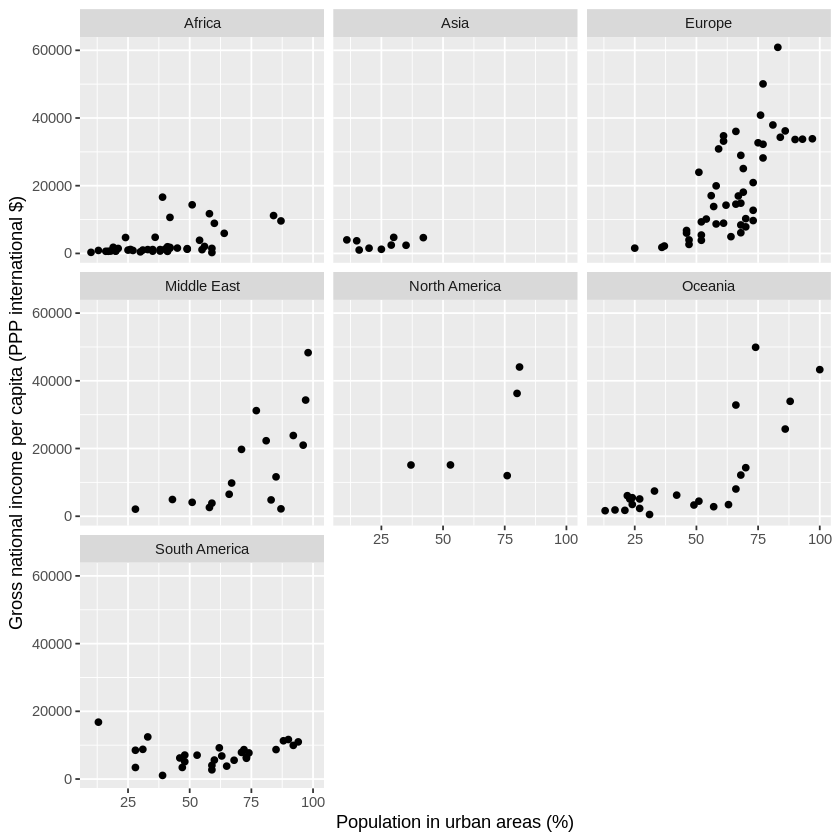

In [ ]:
# gráfico de dispersión según variable categórica
df_who %>% ggplot(
  aes(
    x=`Population in urban areas (%)`
    ,y=`Gross national income per capita (PPP international $)`
  )
) + geom_point(
) + facet_wrap(
  ~ Continent
)

### Ejercicio #2
Graficar un boxplot para estudiar la diferencia en salarios entre razas (race) *Hispanic/Latino, White y Black or African American*. Generar un gráfico independiente para cada género (male vs female). Tener en cuenta únicamente empleados full time.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/employees.csv

In [ ]:
# importamos dataset
df_employees = fread("https://data-wizards.s3.amazonaws.com/datasets/employees.csv")
glimpse(df_employees)

Rows: 2,000
Columns: 10
$ UNIQUE_ID         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ POSITION_TITLE    <chr> "ASSISTANT DIRECTOR (EX LVL)", "LIBRARY ASSISTANT", …
$ DEPARTMENT        <chr> "Municipal Courts Department", "Library", "Houston P…
$ BASE_SALARY       <dbl> 121862, 26125, 45279, 63166, 56347, 66614, 71680, 42…
$ RACE              <chr> "Hispanic/Latino", "Hispanic/Latino", "White", "Whit…
$ EMPLOYMENT_TYPE   <chr> "Full Time", "Full Time", "Full Time", "Full Time", …
$ GENDER            <chr> "Female", "Female", "Male", "Male", "Male", "Male", …
$ EMPLOYMENT_STATUS <chr> "Active", "Active", "Active", "Active", "Active", "A…
$ HIRE_DATE         <IDate> 2006-06-12, 2000-07-19, 2015-02-03, 1982-02-08, 19…
$ JOB_DATE          <IDate> 2012-10-13, 2010-09-18, 2015-02-03, 1991-05-25, 19…


Warning message:
“Removed 68 rows containing non-finite values (`stat_boxplot()`).”


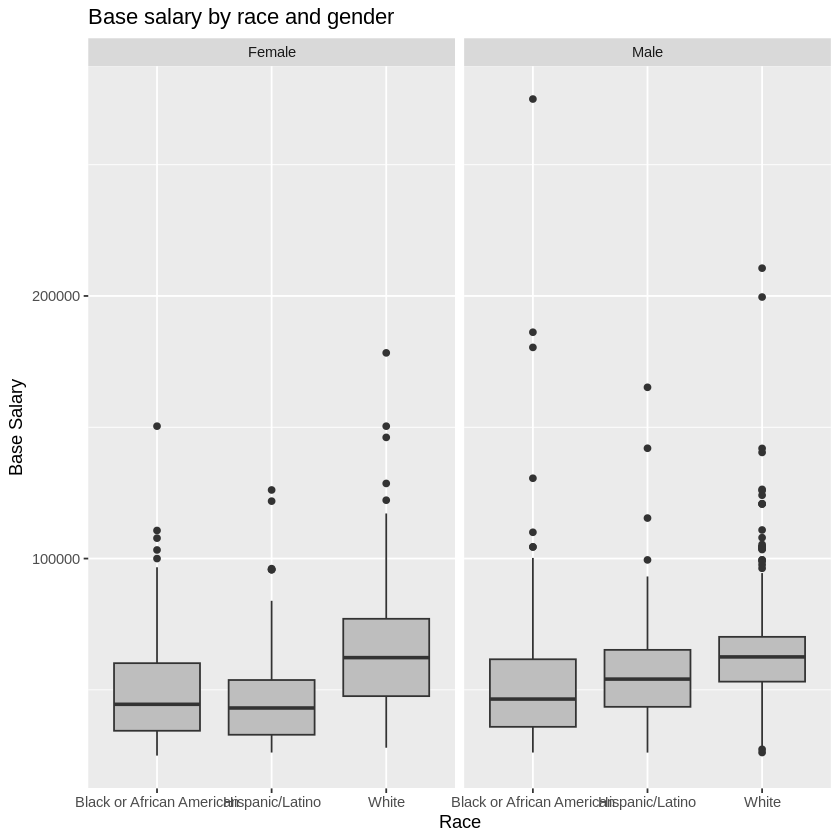

In [ ]:
# gráfico boxplot según variable categórica
df_employees %>% filter(
  RACE %in% c("Hispanic/Latino","White","Black or African American"),
  EMPLOYMENT_TYPE == 'Full Time'  
) %>% ggplot(
  aes(
    x = RACE,
    y= BASE_SALARY
  )
) + geom_boxplot(
  fill="grey"
) + labs(
  title = 'Base salary by race and gender',
  x = 'Race',
  y = 'Base Salary'
) + facet_wrap(
  ~ GENDER
)

### Ejercicio #3
Generar un gráfico de barras para visualizar cantidad de personajes de Star Wars, según planeta de origen. 

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_star_wars.csv

In [ ]:
# importamos dataset
df_starwars = fread("https://data-wizards.s3.amazonaws.com/datasets/dataset_star_wars.csv")
glimpse(df_starwars)

Rows: 87
Columns: 10
$ name       <chr> "Mon Mothma", "Yoda", "Tion Medon", "Ratts Tyerell", "Luke …
$ height     <int> 150, 66, 206, 79, 172, 96, 165, 228, 188, 188, 184, 150, 18…
$ mass       <dbl> NA, 17.0, 80.0, 15.0, 77.0, 32.0, 75.0, 112.0, 79.0, 84.0, …
$ hair_color <chr> "auburn", "white", "none", "none", "blond", "", "brown", "b…
$ skin_color <chr> "fair", "green", "grey", "grey & blue", "fair", "white & bl…
$ eye_color  <chr> "blue", "brown", "black", "unknown", "blue", "red", "blue",…
$ birth_year <dbl> 48.0, 896.0, NA, NA, 19.0, 33.0, 47.0, 200.0, NA, 72.0, NA,…
$ gender     <chr> "female", "male", "male", "male", "male", "", "female", "ma…
$ homeworld  <chr> "Chandrila", "", "Utapau", "Aleen Minor", "Tatooine", "Nabo…
$ species    <chr> "Human", "Yoda's species", "Pau'an", "Aleena", "Human", "Dr…


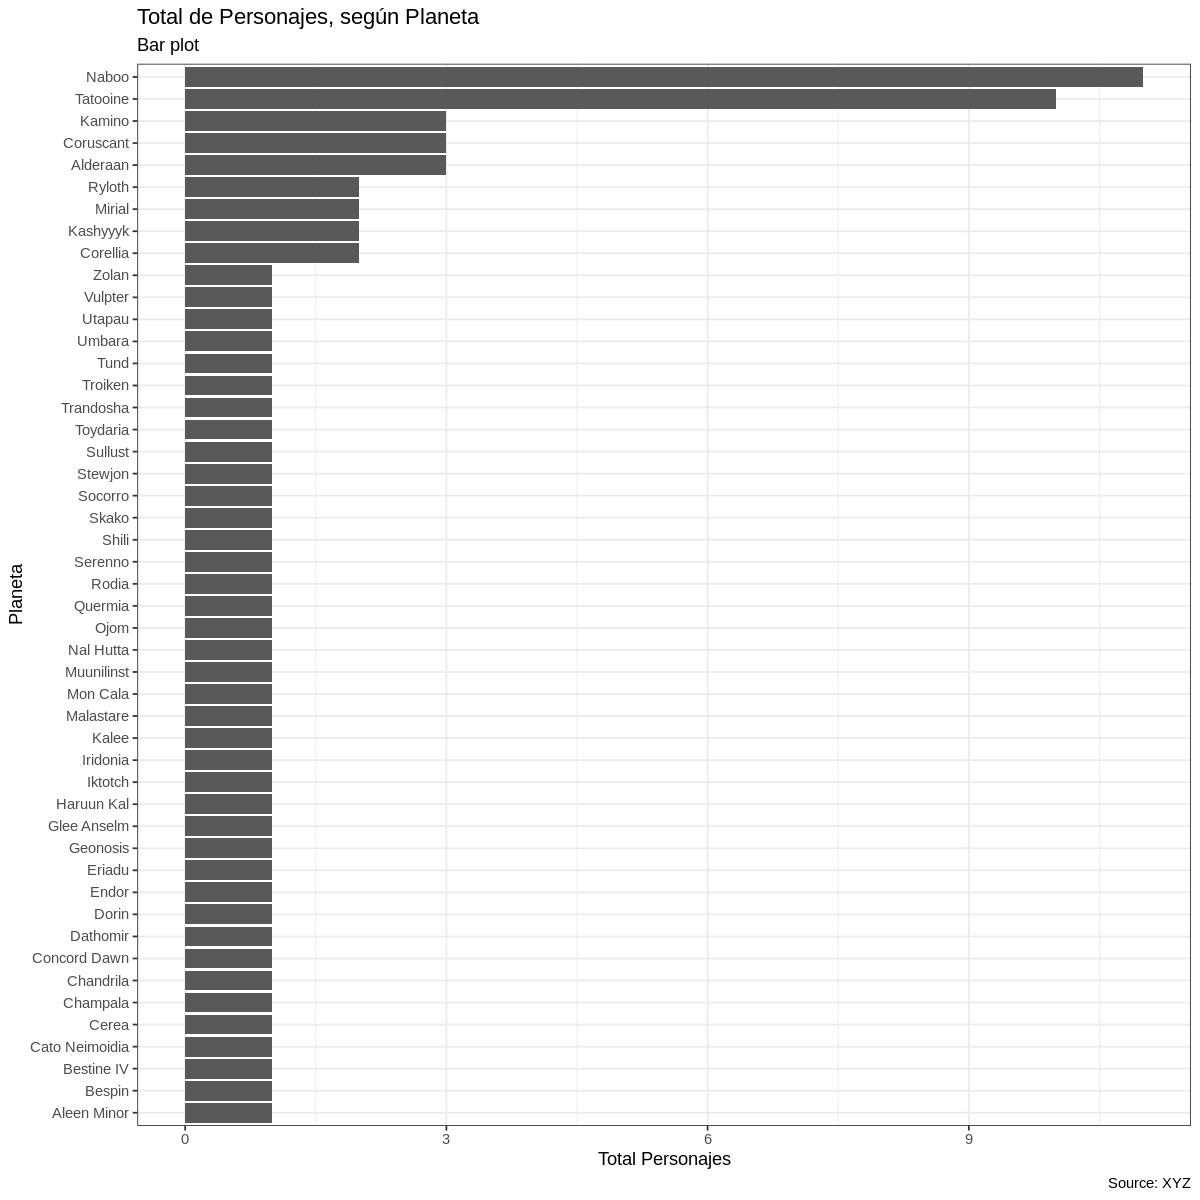

In [ ]:
# gráfico de barra
options(repr.plot.width=10, repr.plot.height=10)

df_starwars %>% filter(
  !homeworld %in% ''
  ) %>% group_by(
    homeworld
  ) %>% summarise(
    characters=n()
  ) %>% arrange(
    desc(characters)
  ) %>% ggplot(
    mapping=aes(
      x=reorder(homeworld,characters)
      ,y=characters
    )
  ) + geom_col(
  ) + theme_bw(
  ) + coord_flip(
  ) + labs(
  title="Total de Personajes, según Planeta"          # Title
  ,subtitle="Bar plot"                                # Subtitle
  ,x="Planeta"                                        # Leyend X
  ,y="Total Personajes"                               # Leyend Y
  ,caption="Source: XYZ"                              # Footnote
  )

### Ejercicio #4
Graficar una serie temporal para estudiar la evolución de la cotización (*High*) desde junio de 2017. Utilizar una escala mensual.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_bitcoin.csv

In [ ]:
# importamos dataset
df_bitcoin = fread("https://data-wizards.s3.amazonaws.com/datasets/dataset_bitcoin.csv")
glimpse(df_bitcoin)

Rows: 452
Columns: 7
$ date       <IDate> 2017-01-01, 2017-01-02, 2017-01-03, 2017-01-04, 2017-01-0…
$ Open       <dbl> 966.34, 997.75, 1011.44, 1035.51, 1114.38, 1004.73, 894.02,…
$ High       <dbl> 1005.00, 1032.00, 1039.00, 1139.89, 1136.72, 1026.99, 907.0…
$ Low        <dbl> 960.53, 990.01, 999.99, 1028.56, 885.41, 871.00, 812.28, 88…
$ Close      <dbl> 997.75, 1012.54, 1035.24, 1114.92, 1004.74, 893.89, 906.20,…
$ volume_BTC <dbl> 6850.59, 8167.38, 9089.66, 21562.46, 36018.86, 27916.70, 20…
$ volume_usd <dbl> 6764742, 8273577, 9276500, 23469645, 36211400, 25523261, 17…


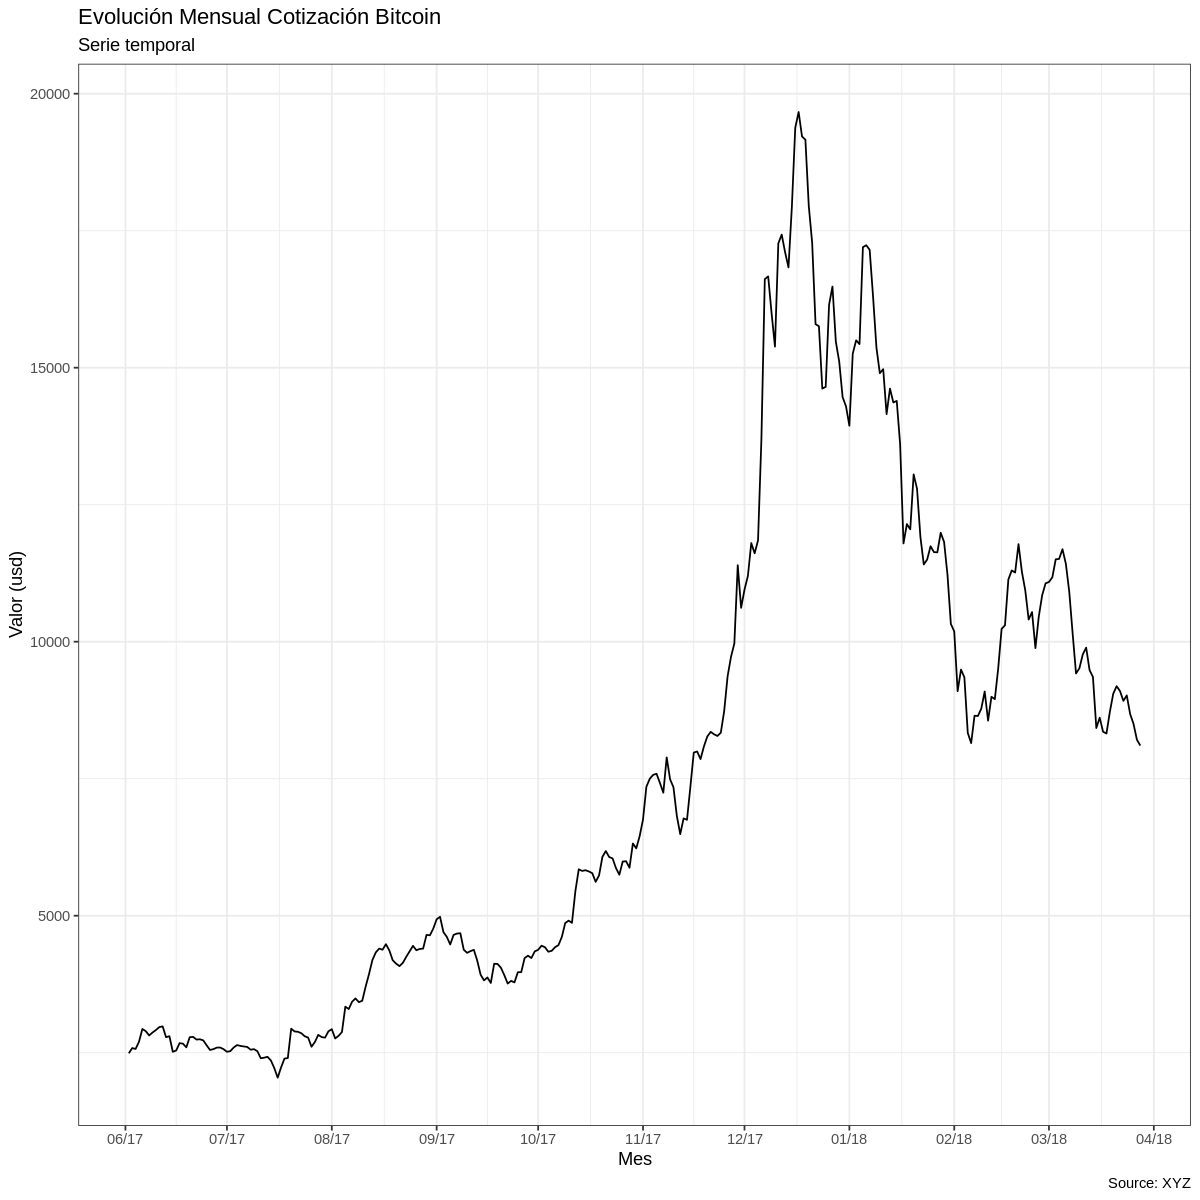

In [ ]:
df_bitcoin %>% filter(date > '2017-06-01') %>% ggplot(
  mapping=aes(
    x=date
    ,y=High
  )
) + geom_line(
) + scale_x_date(
  date_breaks = "month"
  , date_labels = "%m/%y"
) + theme_bw(
) + labs(
  title="Evolución Mensual Cotización Bitcoin"        # Title
  ,subtitle="Serie temporal"                          # Subtitle
  ,x="Mes"                                            # Leyend X
  ,y="Valor (usd)"                                    # Leyend Y
  ,caption="Source: XYZ"                              # Footnote
)